In [1]:
import sys
sys.path.append("..")
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
from LowLevelModules.GeneralFunctions import prettify_plot
import numpy as np

def retardance(x_cal, x_sbc):
    r = 1 - x_sbc/x_cal
    return r

def biref(wvl):
    wvl = wvl * 1e-3
    n_e = np.sqrt(1.28851804 
                  + 1.0950992*wvl**2 / (wvl**2 - 1.02101864e-2)
                  + 1.15662475*wvl**2 / (wvl**2 - 100)
                 )
    n_o = np.sqrt(1.28604141 
                  + 1.07044083*wvl**2 / (wvl**2 - 1.00585997e-2) 
                  + 1.10202242*wvl**2 / (wvl**2 - 100)
                 )
    return n_e - n_o

def micro_setting(r_targ, wvl_targ, wvl_cal, x_cal):
    return (r_targ * wvl_targ * biref(wvl_targ)) / (wvl_cal * biref(wvl_cal)) * x_cal

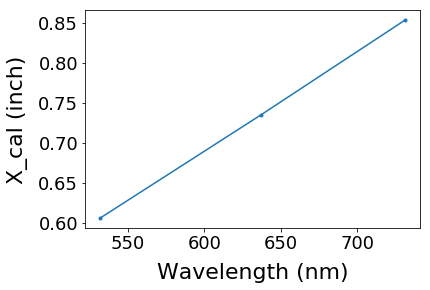

In [16]:
# r=retardance, x=micrometer reading, 
# micrometer reading of full wave retardance
x_cal = {532: 0.6058, 637: 0.735, 731: 0.8536}
x_sbc_meas = {532: 0.0626, 637: 0.72-0.735, 731: 0.793-0.854}
x_sbc = {}
r_dut = {}
fig, ax = plt.subplots()
ax.plot(x_cal.keys(), x_cal.values(), '.-')
prettify_plot(ax, "Wavelength (nm)", "X_cal (inch)")

In [17]:
# check consistency of calibrated versus extrapolated values
print(f"@637: {micro_setting(1, 637, 532, x_cal[532])}")
print(f"@731: {micro_setting(1, 731, 637, x_cal[637])}")

@637: 0.7134381625169768
@731: 0.8348886282016765


In [18]:
# excitation path
x_sbc[532] = 0.0626
wv = 532
r_dut[532] = retardance(x_cal[532], x_sbc[532])
print("Retardance of microscope objective in excitation path")
print(f"@532nm is {r_dut[532]}")
r_dut[637] = r_dut[532] * 637 * biref(637) / (532 * biref(532))
r_dut[731] = r_dut[532] * 731 * biref(731) / (532 * biref(532))
print("\nExtrapolated retardance of objective at different wavelengths")
print(f"@637nm is {r_dut[637]}")
print(f"@731nm is {r_dut[731]}")

Retardance of microscope objective in excitation path
@532nm is 0.8966655661934632

Extrapolated retardance of objective at different wavelengths
@637nm is 1.0559845393484797
@731nm is 1.1994958958623556


Retardance of correcting optics in excitation
Measured:
@532nm is 0.0626
@637nm is -0.015
@731nm is -0.061

From calibration:
@637nm is -0.0411
@731nm is -0.1703


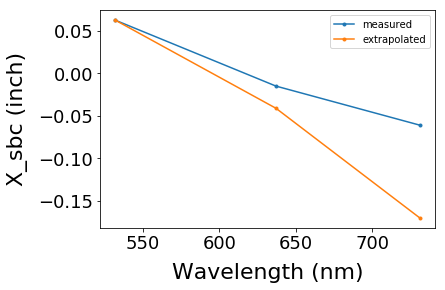

In [22]:
# extracting X_sbc settings
print('Retardance of correcting optics in excitation')
print('Measured:')
for w in x_sbc_meas.keys():
    print(f"@{w}nm is {round(x_sbc_meas[w], 4)}")

print("\nFrom calibration:")
#print(f"@637nm is {(1-r_dut[637])*x_cal[637]}")
#print(f"@731nm is {(1-r_dut[731])*x_cal[731]}")
x_sbc[637] = (1-r_dut[637]) * x_cal[637]
x_sbc[731] = (1-r_dut[731])*x_cal[731]

#print('\nExtrapolated:')
# x_sbc[637] = micro_setting(1-r_dut[637], 637, 532, x_cal[532]) + x_cal[637]
# x_sbc[731] = micro_setting(1-r_dut[731], 731, 532, x_cal[532]) + x_cal[731]
print(f"@637nm is {round(x_sbc[637], 4)}")
print(f"@731nm is {round(x_sbc[731], 4)}")

fig2, ax2 = plt.subplots()
ax2.plot(x_sbc.keys(), x_sbc_meas.values(), '.-')
ax2.plot(x_sbc.keys(), x_sbc.values(), '.-')
plt.legend(['measured', 'extrapolated'])
prettify_plot(ax2, "Wavelength (nm)", "X_sbc (inch)")

In [42]:
#collection path
x_cal_637 = 0.735
x_sbc_637 = 0.0756
wv = 637
r_637 = retardance(x_cal_637, x_sbc_637)
print(f"Retardance of correcting optics in collection path @637nm is {r_637}")
x_sbc_637 = micro_setting(r_637, 637, 637, x_cal_637)
x_sbc_731 = micro_setting(r_637, 731.2, 637, x_cal_637)
print(f"Micro setting @637nm is {x_sbc_637}")
print(f"Micro setting @731nm is {x_sbc_731}")

Retardance of correcting optics in collection path @637nm is 0.8971428571428571
Micro setting @637nm is 0.6594000000000001
Micro setting @731nm is 0.749205160099327


In [21]:
2 - 0.917*637*biref(637)/(532*biref(532))

0.9200680174511922

In [27]:
0.0626 + 0.6058


0.6684

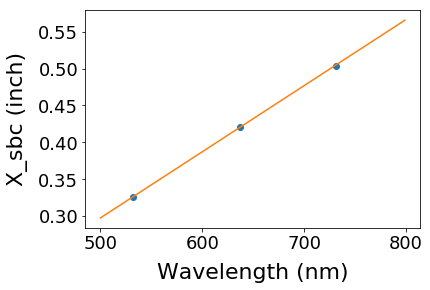

In [10]:
# collection retardance
x_sbc_col = {532: 0.3258, 637: 0.4212, 731: 0.5042}
# fit data
x = np.fromiter(x_sbc_col.keys(), dtype=float)
y = np.fromiter(x_sbc_col.values(), dtype=float)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
xx = np.arange(500, 800, 1)
fig3, ax3 = plt.subplots()
ax3.plot(x_sbc_col.keys(), x_sbc_col.values(), 'o')
ax3.plot(xx, p(xx))
prettify_plot(ax3, "Wavelength (nm)", "X_sbc (inch)")

In [11]:
# input wavelength to know where to set compensator reading
p(750)

0.5216836769701659

In [12]:
# get SBC settings for quarter-waveplate retardance (circular polarization preparation)
# 532nm
0.5354 + 0.25*0.6058

0.68685